In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
##Update the file path accordingly
train_set = '/content/temptrain/'
train_sample_rate = None
test_set = '/content/images/'
validation_set = '/content/Face Mask Dataset/Validation/'


In [5]:

##Compose combines several transformations together
transform_train = transforms.Compose([
                                      transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

#Transformations for training dataset to fit the AlexNet input size

transform = transforms.Compose([
                                transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])



# transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) for transforms.Normalize((0.5), (0.5))
training_dataset = datasets.ImageFolder(train_set, transform=transform_train)
#validation_dataset = datasets.ImageFolder(validation_set, transform=transform)


training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=20, shuffle=True)
#validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 20, shuffle=False)



In [6]:
transform = transforms.Compose([
                                transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

test_dataset = datasets.ImageFolder(test_set,transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 20, shuffle=False)

In [7]:
classes = ('with_mask','without_mask')
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [9]:
# len(images)

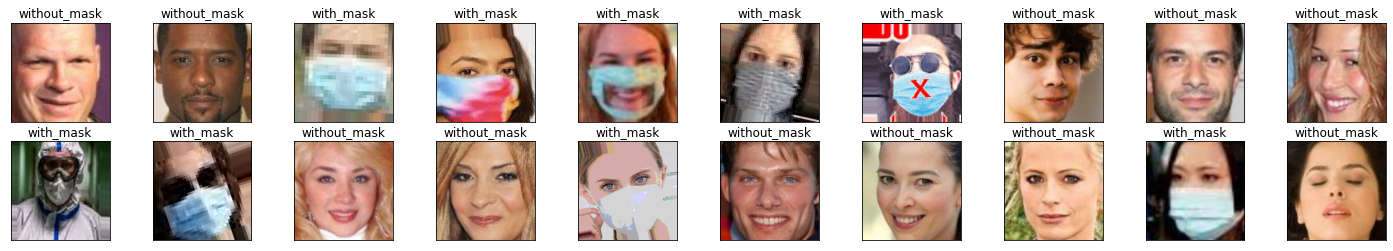

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(len(images)):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [ ]:
model2= models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
for param in model2.features.parameters():
  param.requires_grad = False

In [ ]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))

#last_layer = nn.Linear(n_inputs, 1)
model2.classifier[6] = last_layer
model2.to(device)
print(model.classifier[6].out_features)
print(model.classifier[6].in_features)

2
4096


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr = 0.0001)

NameError: ignored

In [ ]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.0032, acc 0.9760 
validation loss: 0.0008, validation acc 0.9937 
epoch : 2
training loss: 0.0005, acc 0.9965 
validation loss: 0.0010, validation acc 0.9937 
epoch : 3
training loss: 0.0004, acc 0.9965 
validation loss: 0.0011, validation acc 0.9937 
epoch : 4
training loss: 0.0007, acc 0.9940 
validation loss: 0.0007, validation acc 0.9937 
epoch : 5
training loss: 0.0005, acc 0.9980 
validation loss: 0.0010, validation acc 0.9950 


In [ ]:
torch.save(model2, '/content/models/model2.pth')

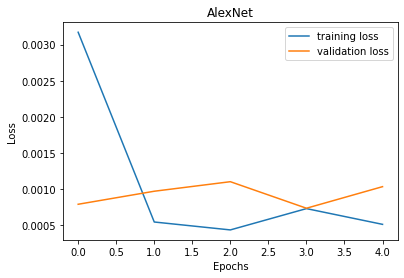

In [ ]:
plt.title("AlexNet")
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



In [ ]:
temp = []
temp1=[]
for i in running_corrects_history:
    temp.append(i.to(device="cpu"))

for i in val_running_corrects_history:
    temp1.append(i.to(device="cpu"))


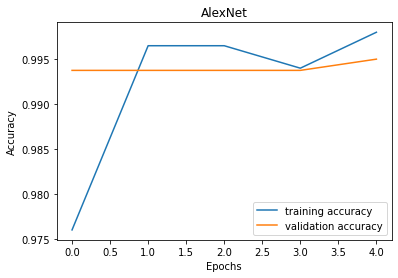

In [ ]:

plt.title("AlexNet")
plt.plot(temp, label='training accuracy')
plt.plot(temp1, label='validation accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


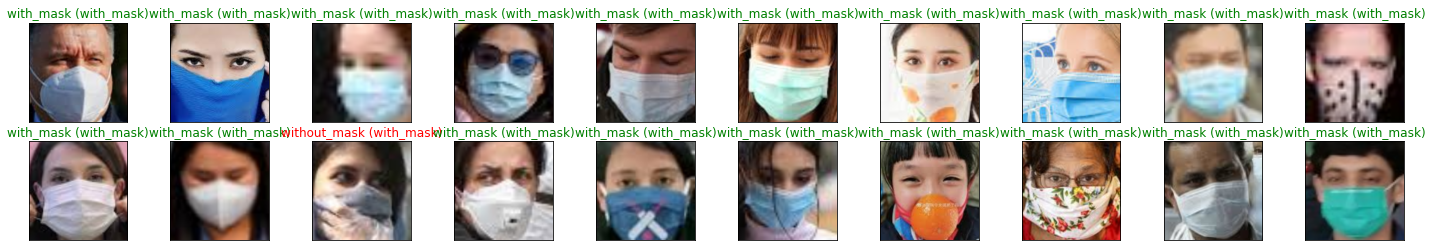

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(len(images)):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

In [12]:

##testing
num_correct = 0
num_samples = 0
for batch_idx, (data,targets) in enumerate(test_loader):
    data = data.to(device="cpu")
    targets = targets.to(device="cpu")
    model = model2.to(device="cpu")
    ## Forward Pass
    scores = model2(data)
    _, predictions = scores.max(1)
    num_correct += (predictions == targets).sum()
    num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)

NameError: ignored

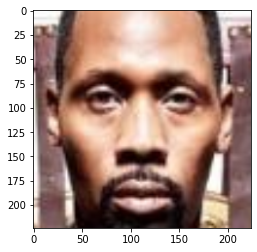

In [20]:
import requests
from PIL import Image
import PIL.ImageOps
path= '/content/images/temptest/1.png'

img = Image.open(path)
plt.imshow(img)

img = transform(img) 
plt.imshow(im_convert(img))



In [27]:
image = img.to(device="cpu").unsqueeze(0)
model1 = model1.to(device="cpu")
output = model1(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

without_mask


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [25]:
# pip install googlenet-pytorch

In [ ]:


model1 = models.googlenet(pretrained=True)
print(model1)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
import torch.nn as nn

n_inputs = model1.fc.in_features
last_layer = nn.Linear(n_inputs, 2)

# last_layer = nn.Linear(n_inputs, 1)
model1.fc = last_layer
model1.to(device)
print(model1.fc.out_features)
print(model1.fc.in_features)

2
1024


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.0001)

In [ ]:
epochs = 20
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model1(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model1(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


epoch : 1
training loss: 0.0001, acc 1.0000 
validation loss: 0.0937, validation acc 0.6300 
epoch : 2
training loss: 0.0001, acc 1.0000 
validation loss: 0.1013, validation acc 0.6125 
epoch : 3
training loss: 0.0001, acc 0.9995 
validation loss: 0.0977, validation acc 0.6175 
epoch : 4
training loss: 0.0000, acc 1.0000 
validation loss: 0.0993, validation acc 0.6262 
epoch : 5
training loss: 0.0001, acc 0.9995 
validation loss: 0.0944, validation acc 0.6050 
epoch : 6
training loss: 0.0000, acc 1.0000 
validation loss: 0.1032, validation acc 0.6162 
epoch : 7
training loss: 0.0000, acc 1.0000 
validation loss: 0.1042, validation acc 0.6225 
epoch : 8
training loss: 0.0000, acc 1.0000 
validation loss: 0.1045, validation acc 0.6287 
epoch : 9
training loss: 0.0000, acc 1.0000 
validation loss: 0.1058, validation acc 0.6375 
epoch : 10
training loss: 0.0007, acc 0.9970 
validation loss: 0.1127, validation acc 0.6162 
epoch : 11
training loss: 0.0003, acc 0.9985 
validation loss: 0.1230

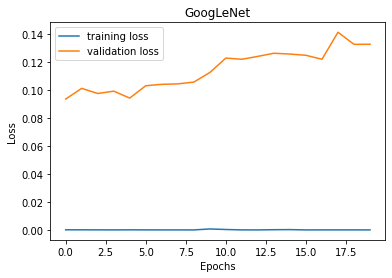

In [ ]:
plt.title("GoogLeNet")
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.legend()

In [ ]:
temp = []
temp1=[]
for i in running_corrects_history:
    temp.append(i.to(device="cpu"))

for i in val_running_corrects_history:
    temp1.append(i.to(device="cpu"))

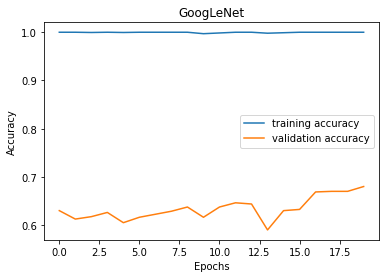

In [ ]:
plt.title("GoogLeNet")
plt.plot(temp, label='training accuracy')
plt.plot(temp1, label='validation accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [11]:
num_correct = 0
num_samples = 0
for batch_idx, (data,targets) in enumerate(test_loader):
    data = data.to(device="cpu")
    targets = targets.to(device="cpu")
    model1 = model1.to(device="cpu")
    ## Forward Pass
    scores = model1(data)
    _, predictions = scores.max(1)
    num_correct += (predictions == targets).sum()
    num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Got 219 / 460 with accuracy 47.61


In [ ]:
torch.save(model1, '/content/models/model1.pth')

In [ ]:
model3 = models.vgg16(pretrained=True)


In [ ]:
model3

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import torch.nn as nn

n_inputs = model3.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 2)

# last_layer = nn.Linear(n_inputs, 1)
model3.classifier[6] = last_layer
model3.to(device)
print(model3.classifier[6].out_features)
print(model3.classifier[6].in_features)

2
4096


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr = 0.0001)

In [ ]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model3(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model3(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.0033, acc 0.9765 
validation loss: 0.0023, validation acc 0.9887 
epoch : 2
training loss: 0.0031, acc 0.9825 
validation loss: 0.0004, validation acc 1.0000 
epoch : 3
training loss: 0.0007, acc 0.9955 
validation loss: 0.0003, validation acc 0.9987 
epoch : 4
training loss: 0.0006, acc 0.9960 
validation loss: 0.0005, validation acc 0.9975 
epoch : 5
training loss: 0.0015, acc 0.9940 
validation loss: 0.0027, validation acc 0.9850 


In [38]:
num_correct = 0
num_samples = 0
for batch_idx, (data,targets) in enumerate(test_loader):
    data = data.to(device="cpu")
    targets = targets.to(device="cpu")
    model4 = model4.to(device="cpu")
    ## Forward Pass
    scores = model4(data)
    _, predictions = scores.max(1)
    num_correct += (predictions == targets).sum()
    num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Got 219 / 460 with accuracy 47.61


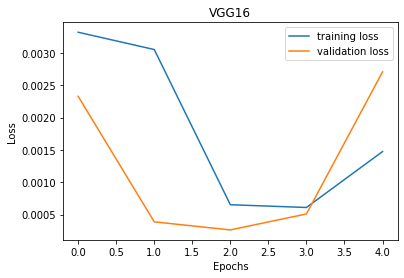

In [ ]:
plt.title("VGG16")
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [ ]:
temp = []
temp1=[]
for i in running_corrects_history:
    temp.append(i.to(device="cpu"))

for i in val_running_corrects_history:
    temp1.append(i.to(device="cpu"))

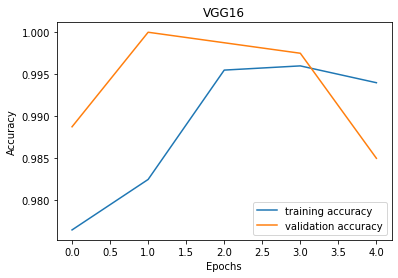

In [ ]:
plt.title("VGG16")
plt.plot(temp, label='training accuracy')
plt.plot(temp1, label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
model4 = models.resnet18(pretrained=True)

In [ ]:
import torch.nn as nn

n_inputs = model4.fc.in_features
last_layer = nn.Linear(n_inputs, 2)

# last_layer = nn.Linear(n_inputs, 1)
model4.fc = last_layer
model4.to(device)
print(model4.fc.out_features)
print(model4.fc.in_features)

2
512


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr = 0.0001)

In [ ]:
epochs = 100
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model4(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model4(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.0026, acc 0.9805 
validation loss: 0.0936, validation acc 0.5250 
epoch : 2
training loss: 0.0002, acc 0.9995 
validation loss: 0.1080, validation acc 0.5575 
epoch : 3
training loss: 0.0003, acc 0.9975 
validation loss: 0.1184, validation acc 0.5562 
epoch : 4
training loss: 0.0001, acc 0.9995 
validation loss: 0.1301, validation acc 0.5525 
epoch : 5
training loss: 0.0000, acc 1.0000 
validation loss: 0.1426, validation acc 0.5900 
epoch : 6
training loss: 0.0006, acc 0.9965 
validation loss: 0.1447, validation acc 0.5475 
epoch : 7
training loss: 0.0002, acc 0.9995 
validation loss: 0.1467, validation acc 0.5650 
epoch : 8
training loss: 0.0001, acc 0.9990 
validation loss: 0.1646, validation acc 0.6075 
epoch : 9
training loss: 0.0002, acc 0.9985 
validation loss: 0.1601, validation acc 0.6200 
epoch : 10
training loss: 0.0000, acc 0.9995 
validation loss: 0.1677, validation acc 0.6000 
epoch : 11
training loss: 0.0000, acc 1.0000 
validation loss: 0.1607

In [24]:
num_correct = 0
num_samples = 0
for batch_idx, (data,targets) in enumerate(test_loader):
    data = data.to(device="cpu")
    targets = targets.to(device="cpu")
    model3 = model3.to(device="cpu")
    ## Forward Pass
    scores = model3(data)
    _, predictions = scores.max(1)
    num_correct += (predictions == targets).sum()
    num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)

NameError: ignored

In [ ]:
temp = []
temp1=[]
for i in running_corrects_history:
    temp.append(i.to(device="cpu"))

for i in val_running_corrects_history:
    temp1.append(i.to(device="cpu"))

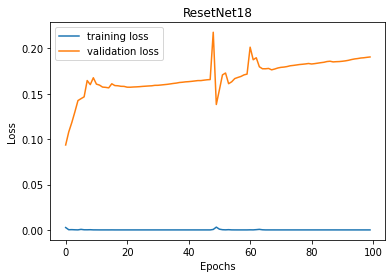

In [ ]:
plt.title("ResetNet18")
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

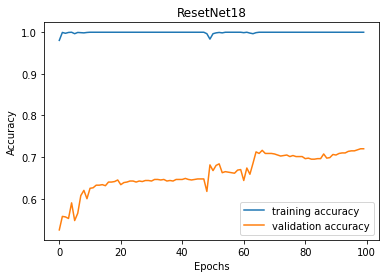

In [ ]:
plt.title("ResetNet18")
plt.plot(temp, label='training accuracy')
plt.plot(temp1, label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [30]:
model = torch.load('/content/models/model1.pth')
# model.eval()

In [31]:
model1 = torch.load('/content/models/model1.pth')
# model1.eval()

In [1]:
# model3 = torch.load('/content/models/model3.pth')
# model3.eval()

In [ ]:
import torch.nn as nn
import torch


class MyEnsemble(nn.Module):

    def __init__(self, modelA, modelB, modelC, modelD, input):
        super(MyEnsemble, self).__init__()
        # modelA = modelA.to(device="cpu")
        # modelB = modelB.to(device="cpu")
        # modelC = modelC.to(device="cpu")
        # modelD = modelD.to(device="cpu")
        self.modelA = modelA
        self.modelB = modelB
        self.modelC = modelC
        self.modelD = modelD

        self.fc1 = nn.Linear(input, 2)

    def forward(self, x):
        out1 = self.modelA(x)
        out2 = self.modelB(x)
        out3 = self.modelC(x)
        out4 = self.modelD(x)

        out = out1 + out2 + out3 + out4
        # argmax across classes
        #result = np.argmax(out, axis=1)
        x = self.fc1(out)
        return torch.softmax(x, dim=1)
        #return result


In [ ]:
en_model = MyEnsemble(model, model1,model3,model4, 2)

<generator object Module.parameters at 0x7f4a83cab750>

In [ ]:
en_model.to(device)
optimizer = torch.optim.Adam(en_model.parameters(),lr=0.003)
# turn this off
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
!wget https://raw.githubusercontent.com/Iamsdt/DLProjects/master/utils/Helper.py


--2022-05-04 17:42:19--  https://raw.githubusercontent.com/Iamsdt/DLProjects/master/utils/Helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21413 (21K) [text/plain]
Saving to: ‘Helper.py.1’

Helper.py.1         100%[===================>]  20.91K  --.-KB/s    in 0.001s  

2022-05-04 17:42:19 (26.5 MB/s) - ‘Helper.py.1’ saved [21413/21413]



In [ ]:
import Helper

In [ ]:
 final_model, train_loss, test_loss = Helper.train(en_model.cuda(), training_loader, test_loader, 3, optimizer, criterion)

Epoch: 1/3


RuntimeError: ignored

In [28]:
##Confusion matrix
@torch.no_grad()
def get_all_preds(model, training_loader):
    all_preds = torch.tensor([])
    for batch in training_loader:
        #print(batch)
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [29]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:

with torch.no_grad():
        prediction_loader = torch.utils.data.DataLoader(training_dataset, batch_size=2000, shuffle=True)
        model1 = model1.to(device="cpu")
        #prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=2000)
        train_preds = get_all_preds(model1, prediction_loader)
        preds_correct = get_num_correct(train_preds, labels)
        print(len(training_dataset))
        print('total correct for :', preds_correct)
        print('accuracy for :', preds_correct / len(training_dataset))

In [ ]:
for inputs, labels in prediction_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

In [32]:
from sklearn.metrics import confusion_matrix
x_test,y_test = next(iter(test_loader))

y_pred1 = model(x_test)
#y = torch.max(y_pred, 1)
y1 = y_pred1.max(1)
confusion_matrix(y1.indices.reshape(-1).detach(),y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
x_test,y_test = next(iter(test_loader))

y_pred1 = model1(x_test)
y1 = y_pred1.max(1)
confusion_matrix(y1.indices.reshape(-1).detach(),y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
x_test,y_test = next(iter(test_loader))

y_pred1 = model3(x_test)
#y = torch.max(y_pred, 1)
y1 = y_pred1.max(1)
confusion_matrix(y1.indices.reshape(-1).detach(),y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
x_test,y_test = next(iter(test_loader))

y_pred1 = model4(x_test)
#y = torch.max(y_pred, 1)
y1 = y_pred1.max(1)
confusion_matrix(y1.indices.reshape(-1).detach(),y_test)